In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2gray

In [2]:
img = cv2.imread('tiles.jpg')
img1 = rgb2gray(img)


In [3]:
first_blur = cv2.GaussianBlur(img1,(3,3),1)  #blurr with guassian with std 1

In [4]:
def gradient_x(image):
    sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return cv2.filter2D(np.array(first_blur), ddepth=-1 , kernel=sobel_x)
def gradient_y(image):
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return cv2.filter2D(np.array(first_blur), ddepth=-1 , kernel= sobel_y)


In [5]:
def calculateResponse(choice):
    alpha = 0.04
    beeta = 0.06
    detA = Ixx * Iyy - Ixy ** 2
    traceA = Ixx + Iyy
    
    # haris calculation
    if choice == 1:
        R = detA - alpha * traceA ** 2
        
    # Rafael calculation
    elif choice == 2:
        R = detA / traceA
    
    # Rohr calculation
    elif choice == 3:
        R = detA
    
    # Shi and Tomasi calculation
    elif choice == 4:
        R = Ixx * Ixx
    
    # Triggs calculation
    else:
        R = Ixx * Ixx - beeta * Iyy * Ixx
    return R

In [6]:
I_x = gradient_x(np.array(first_blur))
I_y = gradient_y(np.array(first_blur))

In [7]:
Ixx = cv2.GaussianBlur(I_x**2,(3,3),2)
Ixy = cv2.GaussianBlur(I_y*I_x,(3,3),2)
Iyy = cv2.GaussianBlur(I_y**2, (3,3),2)

In [8]:
print("Press 1 for Harris corner detection")
print("Press 2 for Richel/Szeliski corner detection")
print("Press 3 for Rohr corner detection")
print("Press 4 for Shi & Tamasi corner detection")
print("Press 5 for triggs corner detection")

Press 1 for Harris corner detection
Press 2 for Richel/Szeliski corner detection
Press 3 for Rohr corner detection
Press 4 for Shi & Tamasi corner detection
Press 5 for triggs corner detection


In [9]:
x = int(input())

1


In [10]:
R = calculateResponse(x)

In [11]:
# detecting corners
Detected_image = np.copy(img)
#imgCopy = np.zeros_like(original)
for i, row in enumerate(R):
    if i >= Detected_image.shape[0]:
        break
    for j,x in enumerate(row):
        if j >= Detected_image.shape[1]:
                 break
        if x > 0:
            Detected_image[i , j] = [0,0,0]

(-0.5, 998.5, 1079.5, -0.5)

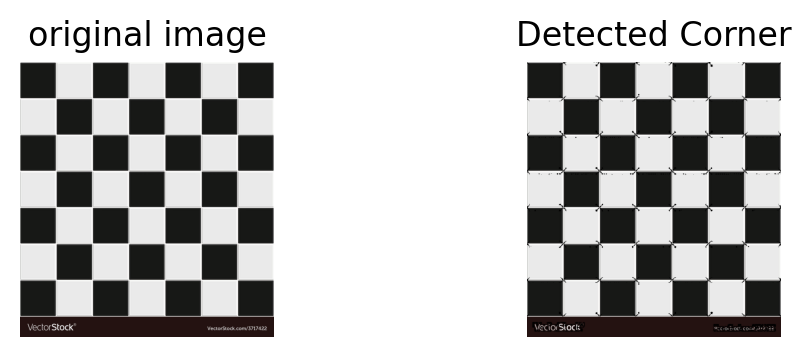

In [12]:
plt.figure(dpi=200)

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('original image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(Detected_image)
plt.title('Detected Corner')
plt.axis('off')
